# PRÁTICA GUIADA: Árvores de decisão

## Introdução

Nessa prática, descobriremos como aplicar [árvores de decisão](https://scikit-learn.org/stable/modules/tree.html) em problemas de regressão e classificação. Em particular, usaremos árvores de regressão para prever o preço médio das casas em Boston e prever a aceitabilidade dos carros.

### Outros recursos

- [scikit-learn documentação de árvores de decisão](http://scikit-learn.org/stable/modules/tree.html)
- [Gini Vs Entropia](http://www.garysieling.com/blog/sklearn-gini-vs-entropy-criteria)

## 1 Construir uma árvore de regressão.

### Como o computador constrói uma árvore de regressão?

#### A abordagem ideal seria o computador considerar todas as partições possíveis do espaço de atributos. Contudo, isso é computacionalmente inviável, portanto, ao invés disso, é usado um algoritmo guloso ([greedy](https://brilliant.org/wiki/greedy-algorithm/#:~:text=A%20greedy%20algorithm%20is%20a,to%20solve%20the%20entire%20problem.)) de **divisão binária recursiva: **

- Começar na raiz da árvore.
- Para cada atributo, examinar cada possível ponto de corte e escolher o atributo e o ponto de corte de forma que a árvore resultante da divisão tenha o **menor erro quadrático médio (EQM)**.
- Repetir o processo para as duas ramificações resultantes e fazer novamente uma única divisão (em cada ramificação) para minimizar o EQM.
- Repetir este processo até que um critério de parada seja cumprido.

### Como saber quando parar?

1. Poderíamos definir um critério de parada, como [profundidade máxima](https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d) da árvore ou [o número mínimo de amostras na folha](https://medium.com/@justindixon91/decision-trees-afc984d161bf).
2. Poderíamos também fazer a árvore grande crescer e depois "podá-la" usando algum método de poda, como [cost complexity pruning](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#total-impurity-of-leaves-vs-effective-alphas-of-pruned-tree).

### Como decidir qual divisão é a melhor?

#### Uma maneira de decidir qual é a melhor divisão é calcular o ganho na redução do erro quadrático médio, se a divisão candidata for aplicável.

$$
\Delta =EQM(\text{pai}) - \sum_{j \in \text{filhos}}\frac{N_j}{N}ECM(\text{filho}_j)
$$

#### O objetivo é encontrar o $\Delta$ máximo, onde $EQM$ é o Erro Quadrático Médio, $N_j$ é o número de registros no nó filho $j$ e $N$ são o número de registros no nó pai.

### 1.a Fazer uma análise descritiva do conjunto de dados

#### O conjunto de treinamento é o velho conhecido conjunto de dados de Boston. O objetivo é prever o preço médio dos municípios.   

#### Instruções:

1. Ler os dados com Pandas.
- Explorar os dados ordenando-os ou representando-os graficamente.

#### Vamos importar as bibliotecas:

* [`numpy`](https://numpy.org/), para a manipulação dos dados.

* [`pandas`](https://pandas.pydata.org/), para a manipulação dos dados.

* [`matplotlib.pyplot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html), para a visualização dos dados

* [`sklearn.datasets.load_boston`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html), para baixarmos os dados do dataset Boston, com informações sobre o mercado imobiliário.

In [82]:
#Ler os dados com Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

####  <span style = "color:red">Código Original.</span>
<!---
#Ler os dados com Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
-->

#### Depois fazemos a leitura do dataset, instanciando um objeto `data` e realizando a separação dos mesmos entre dados descritivos e o target.

In [83]:
data = load_boston()
#type(data)

X = pd.DataFrame(data.data, 
                 columns = data.feature_names
                )
y = pd.DataFrame(data.target, 
                 columns = ['price']
                )
#X.head()
#y.head()

####  <span style = "color:red">Código Original.</span>
<!---
data = load_boston()
X = pd.DataFrame(data.data, 
                 columns = data.feature_names
                )
y = pd.DataFrame(data.target, 
                 columns = ['price']
                )
-->

## 2 Construir uma árvore de regressão com scikit-learn

#### Como você pode imaginar, construir uma árvore à mão não é tão fácil. Agora vamos usar o `scikit-learn` para construir uma árvore de regressão ideal.  Vamos fazer o seguinte:

- Criar uma matriz `X` contendo os valores dos atributos e um vetor `y` contendo os preços

- Dividir os dados em treinamento e teste usando os parâmetros `random_state`, para a semente da distribuição pseudoaleatória e um `test_size` para definir o tamanho do subconjunto de teste.

- Importar e inicializar o `DecisionTreeRegressor` do scikit-learn.

- Ajustá-lo ao conjunto de treinamento.

- Prever os valores do conjunto de teste.

- Mostrar os valores previstos e reais em um gráfico.

- Usar `r2_score` para julgar a qualidade da regressão.

In [84]:
# começamos em teste de treinamento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 41
                                                   )

####  <span style = "color:red">Código Original.</span>
<!---
# começamos em teste de treinamento
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 41
                                                   )
-->

#### Aqui vamos importar a biblioteca: 

* [`sklearn.tree.DecisionTreeRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), que faz o cálculo de uma regressão linear, por meio de uma árvore de decisão. O parâmetro `random_state` controla a aleatoriedade do estimador.

#### Instanciamos um objeto `treereg` para receber o modelo de regressão por árvore de decisão e aplicamos o método [.fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.fit), para construir um regressor de árvore de decisão a partir do conjunto de treinamento `(X, y)`. O juste tomará como argumento as matrizes `X`e `y`, porém, neste caso, espera-se que `y` tenha valores de ponto flutuante em vez de valores inteiros.

In [85]:
# Importar o DecisionTreeRegressor, inicializá-lo e ajustá-lo ao conjunto de treinamento
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state = 1)

treereg.fit(X_train, 
            y_train
           )

DecisionTreeRegressor(random_state=1)

####  <span style = "color:red">Código Original.</span>
<!---
# Importar o DecisionTreeRegressor, inicializá-lo e ajustá-lo ao conjunto de treinamento
from sklearn.tree import DecisionTreeRegressor

treereg = DecisionTreeRegressor(random_state = 1)

treereg.fit(X_train, 
            y_train
           )
-->

#### Instanciamos um objeto `preds` para receber as previsões de nosso modelo, realizadas com o auxílio do método [`predic()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor.predict), que  prevê a classe ou valor de regressão para `X`, nesse caso o valor previsto com base em `X` é retornado.

In [86]:
# Prever os preços do conjunto de teste
preds = treereg.predict(X_test)

####  <span style = "color:red">Código Original.</span>
<!---
# Prever os preços do conjunto de teste
preds = treereg.predict(X_test)
-->

#### Mostramos a seguir um plote com os valores calculados para as previsões e aqueles obtidos com o subconjunto de teste.

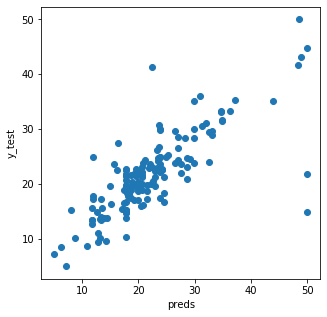

In [87]:
# Mostrar os valores previstos e reais em um gráfico
plt.figure(figsize = (5,5))
plt.scatter(preds, 
            y_test
           )
plt.xlabel("preds")
plt.ylabel("y_test")
plt.show()

####  <span style = "color:red">Código Original.</span>
<!---
# Mostrar os valores previstos e reais em um gráfico
plt.figure(figsize = (5,5))
plt.scatter(preds, 
            y_test
           )
-->

#### Podemos perceber um certo alinhamento entre os valores preditos e os de teste. Entretanto, para uma medida objetiva, podemos aplicar o método [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html), para calcular o [coeficiente de determinação da árvore de decisão](https://acadgild.com/blog/using-decision-trees-for-regression-problems).

In [88]:
# Usar r2_score para julgar a qualidade da regressão
from sklearn.metrics import r2_score

r2_score(y_test, 
         preds
        )

0.46529064345422977

####  <span style = "color:red">Código Original.</span>
<!---
# Usar r2_score para julgar a qualidade da regressão
from sklearn.metrics import r2_score

r2_score(y_test, 
         preds
        )
-->

### 2.b Parâmetros globais

#### A classe [DecisionTreeRegressor] oferece poucos parâmetros globais que possam ser alterados na inicialização. Por exemplo, podem ser estabelecidos os parâmetros:

- `max_depth`, que define a profundidade máxima da árvore (Número de nós). Se nenhum valor for especificado, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos do que um valor `min_samples_split` de amostras.

- `min_samples_leaf`, que define número mínimo de amostras necessárias para estar em um nó folha.

#### Podem ser impostas restrições globais no espaço das soluções.

1. Usar `cross_val_score` e fazer uma validação cruzada de 3-fold para encontrar o valor ideal para` max_depth` (explorar os valores de 1 a 10). Ter em mente que `scoring='neg_mean_squared_error'` deverá ser definido como critério para o score. Sempre estabelecer `random_state=1`
- Representar o erro graficamente como função de `max_depth`

In [89]:
DecisionTreeRegressor()

DecisionTreeRegressor()

####  <span style = "color:red">Código Original.</span>
<!---
DecisionTreeRegressor()
-->

#### Para a obtenção dos melhores valores de profundidade de para a árvore, vamos fazer uso da biblioteca:

- [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html), que realiza uma avaliação do modelo, por meio da validação cruzada, retornando uma pontuação.

In [90]:
# Usar a validação cruzada para encontrar o melhor max_depth
from sklearn.model_selection import cross_val_score
import numpy as np

####  <span style = "color:red">Código Original.</span>
<!---
# Usar a validação cruzada para encontrar o melhor max_depth
from sklearn.model_selection import cross_val_score
import numpy as np
-->

#### O código a seguir varre uma uma variedade de possíveis valores para a profundidade máxima `max_depth` da árvore em questão, instanciando em cada `loop` um objeto `treereg` que recebe o modelo de árvore de regressão, em que os recursos são sempre permutados aleatoriamente  em cada divisão, através do parâmetro `random_state`, que controla a aleatoriedade do estimador.

#### O objeto `scores` recebe os o arranjo de pontuações do estimador para cada execução da validação cruzada `cross_val_score`, considerando o modelo instanciado `treereg`, os valores dos arranjos de atributos descritivos `X` e dos targets `y`, o número de dobras a serem utilizadas `cv` e a métrica de pontuação `scoring`.

#### Inicializamos uma lista `all_scores` para receber os valores dos `scores` calculados e os objetos `best_score` e `best_depth`, que fazem referência às melhores opções possívels para a profundidade da árvore de decisão e para a melhor pontuação do modelo.

#### O código corre em um laço sobre um intervalo de valores possíveis de profundidade máxima `max_depth` para a árvore de decisão, a cada ciclo a validação cruzada [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) é aplicada e o objeto `current_score` recebe a média da raíz quadrada dos `scores` obtidos em cada modelo, repare no produto dessa quantidade pelo valore $-1$, uma vez que `'neg_mean_squared_error'` pdoe retornar valores negativos. Uma condição é aplicada ao objeto `current_score`, para a obtenção das melhores pontuações e, em caso afirmativo, a profundidade associada à melhor pontuação é atribuída ao objeto `best_depth`.

#### Ao fim do laço os `scores` são adicionados à lista `all_scores` para a geração de um gráfico de Profundidades da árvore de decisão $\times$ Pontuação do modelo.

Melhor score: 5.982697567864072
Melhor depth: 4


DecisionTreeRegressor(max_depth=4, random_state=42)

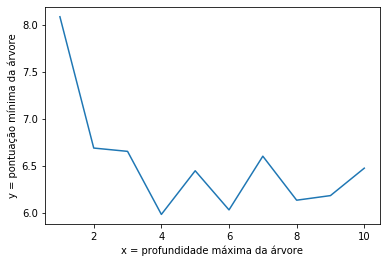

In [91]:
all_scores = []
best_score = -1
best_depth = 0

for i in range(1, 11):
    treereg = DecisionTreeRegressor(max_depth = i, 
                                    random_state = 1
                                   )

    scores = cross_val_score(treereg, 
                             X, 
                             y, 
                             cv = 3, 
                             scoring = 'neg_mean_squared_error'
                            )
#    print(scores)
    current_score = np.mean(np.sqrt(-scores))
    
    # Selecionar o melhor comparando com o melhor até agora.
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i

    # Adicionar à lista de scores para o gráfico
    all_scores.append(current_score)
    
print("Melhor score: %s" % best_score)
print("Melhor depth: %s" % best_depth)

# Representar o erro graficamente como uma função do max_depth
plt.figure()

plt.plot(range(1, 11), 
         all_scores
        )
plt.xlabel('x = profundidade máxima da árvore')
plt.ylabel('y = pontuação mínima da árvore')

# Ajustar o modelo usando a melhor max_depth
treereg = DecisionTreeRegressor(max_depth = best_depth, 
                                random_state = 42
                               )
treereg.fit(X, y)

In [92]:
#from sklearn.metrics import cross_val_score
#sklearn.metrics.SCORERS.keys()

####  <span style = "color:red">Código Original.</span>
<!---
all_scores = []
best_score = -1
best_depth = 0

for i in range(1, 11):
    treereg = DecisionTreeRegressor(max_depth = i, 
                                    random_state = 1
                                   )

    scores = cross_val_score(treereg, 
                             X, 
                             y, 
                             cv = 3, 
                             scoring = 'neg_mean_squared_error'
                            )

    current_score = np.mean(np.sqrt(-scores))
    
    # Selecionar o melhor comparando com o melhor até agora.
    if current_score < best_score or best_score == -1:
        best_score = current_score
        best_depth = i

    # Adicionar à lista de scores para o gráfico
    all_scores.append(current_score)
    
print("Melhor score: %s" % best_score)
print("Melhor depth: %s" % best_depth)

# Representar o erro graficamente como uma função do max_depth
plt.figure()

plt.plot(range(1, 11), 
         all_scores
        )
plt.xlabel('x = profundidade máxima da árvore')

# Ajustar o modelo usando a melhor max_depth
treereg = DecisionTreeRegressor(max_depth = best_depth, 
                                random_state = 42
                               )
treereg.fit(X, y)
-->

### 2.c Importância dos atributos

#### A classe `DecisionTreeRegressor` expõe um atributo chamado `feature_importances_`. É a contribuição para a redução da métrica de erro usada (neste caso, MSE) ao longo de toda a árvore. 

- O atributo `feature_importances_` retorna a importância de um recurso é calculada como a redução total (normalizada) do critério trazido por esse recurso. É também conhecida como a importância Gini ou [importância da impureza de Gini](https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33): $GI = 1 - \sum_{i = 1}^{N} p_{1}$.

In [93]:
pd.DataFrame({'atributo':data.feature_names, 
              'importancia':treereg.feature_importances_}
            ).sort_values('importancia',
                          ascending = False
                         )

,atributo,importancia
5,RM,0.630795
12,LSTAT,0.193254
7,DIS,0.075002
4,NOX,0.041732
0,CRIM,0.040373
11,B,0.014712
10,PTRATIO,0.004132
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000


####  <span style = "color:red">Código Original.</span>
<!---
pd.DataFrame({'atributo':data.feature_names, 
              'importancia':treereg.feature_importances_}
            ).sort_values('importancia',
                          ascending = False
                         )
-->

### 2.d Visualização da árvore

#### Para a visualização da  [árvore de decisão](http://scikit-learn.org/stable/modules/tree.html) vamos importar a biblioteca:

* [`sklearn.tree.export_graphviz`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html), que gera uma representação `GraphViz` da árvore de decisão, podendo ser exportada em um `out_file`.

#### Pode ser necessário instalar o `pydotplus`, caso ainda não esteja instalado.

In [94]:
#!pip install pydotplus
#!pip install graphviz
#!conda install graphviz

from sklearn.tree import export_graphviz

####  <span style = "color:red">Código Original.</span>
<!---
#!pip install pydotplus
#!pip install graphviz
#!conda install graphviz

from sklearn.tree import export_graphviz
-->

#### Vamos também importar as bibliotecas:

* [`IPython.display.Image`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image), cria um objeto de imagem PNG / JPEG / GIF a partir de dados brutos. Quando este objeto é retornado por uma célula de entrada ou passado para a função de exibição, isso resultará na imagem sendo exibida no `frontend`.

* [`pydotplus`](https://pydotplus.readthedocs.io/), que é uma versão melhorada do antigo projeto `pydot` que fornece uma interface `Python` para a linguagem `Dot` do `Graphviz`.

#### Note que a célula a seguir expoem um objeto `dot_data` que instancia a função `export_graphviz`, cujos parâmetros:


- `out_file`, que estabelece o identificador ou nome do arquivo de saída. Se definido como `None`, o resultado é retornado como uma `string`.
- `feature_names`, que recebe os nomes dos atributos analizados na árvore.
- `filled`, que quando definido como `True`, pinta os nós para indicar a classe majoritária para classificação, extremidade dos valores para regressão ou pureza do nó para multi-saída.
- `rounded`, que quando definido como `True`, desenhe caixas de nós com cantos arredondados e use fontes `Helvetica` em vez de `Times-Roman`.
- `special_characters`, que quando definido como `False`, ignora os caracteres especiais para compatibilidade `PostScript`.

#### Por fim, a função [`pydotplus.graphviz.graph_from_dot_data()`](https://pydotplus.readthedocs.io/reference.html#pydotplus.graphviz.graph_from_dot_data), instanciada no objeto `graph`, carrega o gráfico conforme definido pelos dados no formato `DOT`. Os dados são considerados no formato `DOT`, ele será analisado e uma classe `Dot` será retornada, representando o gráfico.

#### A função [`Image()`](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#IPython.display.Image) gera a imagem de saída.

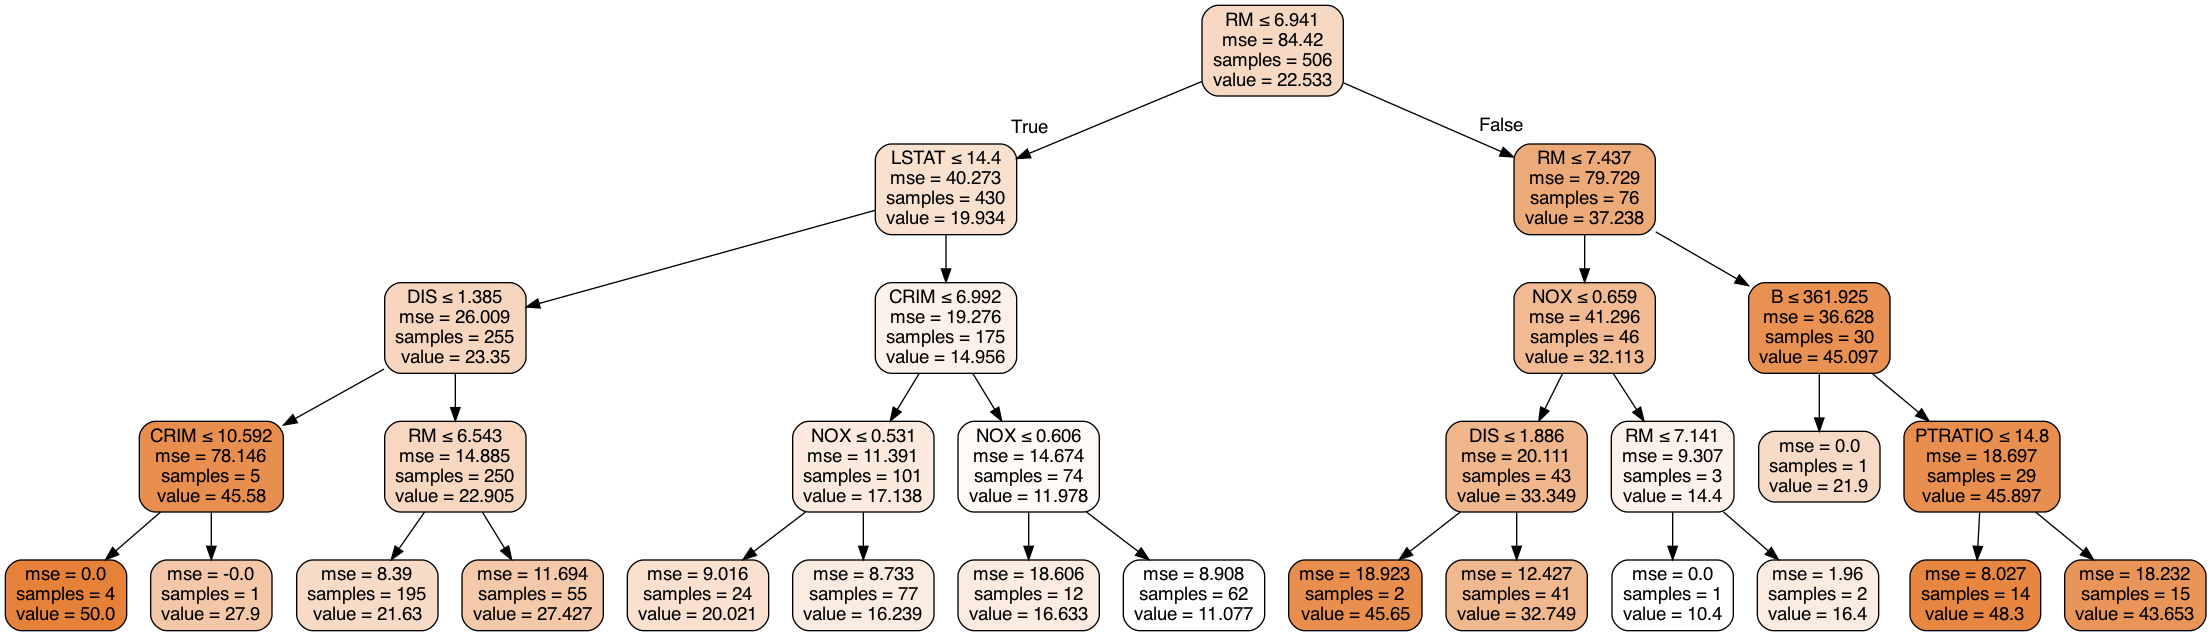

In [95]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(treereg, 
                         out_file = None, 
                         feature_names = data.feature_names, 
                         filled = True, 
                         rounded = True, 
                         special_characters = True
                        )

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())

####  <span style = "color:red">Código Original.</span>
<!---
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(treereg, 
                         out_file = None, 
                         feature_names = data.feature_names, 
                         filled = True, 
                         rounded = True, 
                         special_characters = True
                        )

graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())
-->

#### Interpretando o diagrama de uma árvore

Como ler esta árvore de decisão?

**Nós internos:**

- A primeira linha é a condição usada para dividir esse nó (vai para a esquerda se for verdade, vai para a direita se for falso).
- `samples` é o número de observações no nó antes de ser dividido. (verificar se é a soma do valor `samples` dos seus nós filhos)
- `mse` é o erro quadrático médio calculado pela comparação dos valores de resposta observados nesse nó com o valor médio de resposta nesse nó.


**Folhas:**

- `samples` é o número de observações no nó.
- `value` é o valor médio de resposta nesse nó.
- `mse` é o erro quadrático médio calculado pela comparação dos valores de resposta observados nesse nó com `value`.

### 2.e Usar GridSearchCV para encontrar a melhor Árvore de Regressão

#### Como sabemos que a poda com profundidade máxima `max_depth` é o melhor modelo para nós? As árvores oferecem uma variedade de formas de pré-poda (isto é, dizemos ao computador como projetar a árvore resultante com certas restrições).


- max_depth, que define a profundidade máxima da árvore. Se definido como `None`, os nós são expandidos até que todas as folhas sejam puras ou até que todas as folhas contenham menos do que `min_samples_split` amostras.             
- max_features, que define o número de atributos a serem considerados ao procurar a melhor divisão.

- max_leaf_nodes, que aponta para o crescimento de uma árvore com `max_leaf_nodes` da melhor maneira possível. Os melhores nós são definidos como redução relativa de impurezas. Se definido como `None`, então um número ilimitado de nós folha pode ser gerado.

- min_samples_leaf, que define o número mínimo de amostras necessárias para estar em um nó folha. Um ponto de divisão em qualquer profundidade só será considerado se deixar pelo menos `min_samples_leaf` amostras de treinamento em cada um dos ramos esquerdo e direito. Isso pode ter o efeito de suavizar o modelo, especialmente na regressão.

- min_samples_split, que define o número mínimo de amostras necessárias para dividir um nó interno.     

#### Vamos inicializar intervalos razoáveis para todos os parâmetros e encontrar a combinação ideal usando a biblioteca [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

#### Criamos uma dicionário com valores possíveis para os hyperparâmetros que pretendemos otimizar com o `Grid Search` e instanciamos um modelos `model` para receber a árvore de decisão.

#### Depois disso aplicamos a busca em grade pelos melhores hiperparâmetros, instanciando o objeto `gs` que recebe a função `GridSearchCV()`. Ela deve receber os argumentos do modelo `model`, os seus hiperparâmetros `PARAMETROS`, emitir mensagens de saída `verbose` e rodar em um número definido de processadores em paralelo `n_jobs`. Além disso a métrica `scoring` é definido como [`neg_mean_squared_error`](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values).

#### Observe que na célula acima são impressos em tela o estimador adotado e os valores dos melhores `scores`. 

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 8640 out of 8640 | elapsed:  1.6min finished


DecisionTreeRegressor(max_depth=6, max_features=4, max_leaf_nodes=9,
                      min_samples_leaf=3, random_state=1)
-33.76323661160101
5.810614133772868


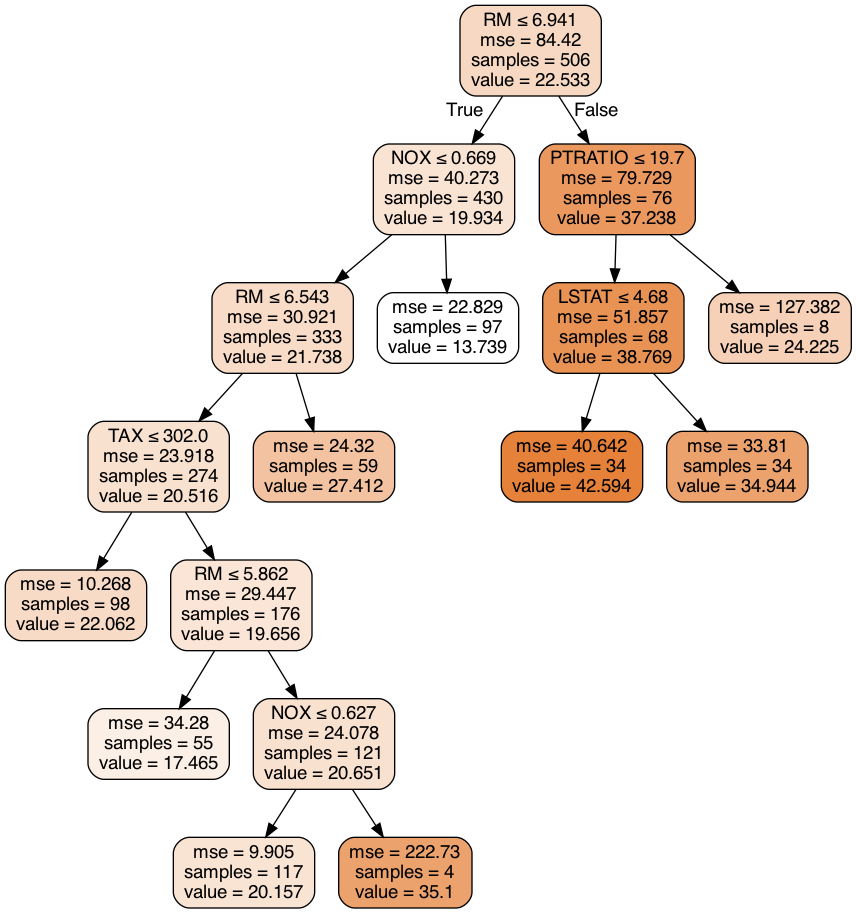

In [96]:
from sklearn.model_selection import GridSearchCV

PARAMETROS = {'max_depth':[1,2,3,4,5,6], 
              'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 
              'min_samples_leaf':[1,2,3,4], 
              'min_samples_split':[2,3,4]}

#A busca é feita com Grid Search

model = DecisionTreeRegressor(random_state = 1)

gs = GridSearchCV(model, 
                  PARAMETROS, 
                  scoring = 'neg_mean_squared_error', 
                  verbose = 1, 
                  n_jobs = None
                 )

gs.fit(X, y)

# São exibidos os melhores resultados
print(gs.best_estimator_)
print(gs.best_score_)
print(np.sqrt(-gs.best_score_))

# A melhor árvore é representada graficamente
dot_data = export_graphviz(gs.best_estimator_, 
                           out_file = None, 
                           feature_names = X.columns, 
                           filled = True, 
                           rounded = True, 
                           special_characters = True
                          )

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())  

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.model_selection import GridSearchCV

PARAMETROS = {'max_depth':[1,2,3,4,5,6], 
              'max_features':[1,2,3,4], 
              'max_leaf_nodes':[5,6,7,8,9,10], 
              'min_samples_leaf':[1,2,3,4], 
              'min_samples_split':[2,3,4]}

#A busca é feita com Grid Search

model = DecisionTreeRegressor(random_state = 1)

gs = GridSearchCV(model, 
                  PARAMETROS, 
                  scoring = 'neg_mean_squared_error', 
                  verbose = 1, 
                  n_jobs = None
                 )

gs.fit(X, y)

# São exibidos os melhores resultados
print(gs.best_estimator_)
print(gs.best_score_)
print(np.sqrt(-gs.best_score_))

# A melhor árvore é representada graficamente
dot_data = export_graphviz(gs.best_estimator_, 
                           out_file = None, 
                           feature_names = X.columns, 
                           filled = True, 
                           rounded = True, 
                           special_characters = True
                          )

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
-->



#### Por fim, usa-se a função [`export_graphviz()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html) para imprimir a árvore de decisão otimizada. Nore que essa função recebe os parâmetros:

- gs.best_estimator_, 

- out_file, que define o identificador ou nome do arquivo de saída.
- feature_names, que carrega os nomes de cada um dos atributos.
- filled, que colore os nós da árvore de decisão.
- rounded, que arredonda os cantos dos nós.
- special_characters, que considera, ou não, caracteres especiais para compatibilidade com `PostScript`.

## 3 Árvores de Classificação

As árvores de classificação são muito semelhantes às árvores de regressão. Aqui está uma comparação rápida:

| árvores de regressão                            | árvores de classificação |
| :------------------:                            | :-----------------------:|
| preveem respostas contínuas                     | preveem respostas categóricas |
| Prevê usando a resposta média em cada folha     | prevê usando a classe mais comum em cada folha |
| São escolhidas as divisões para minimizar o EQM | São escolhidas as divisões para minimizar <br/> um critério diferente (discutido posteriormente) |



### 3.a Construindo uma árvore de classificação com `scikit-learn`.

#### Vamos construir uma árvore de classificação usando o conjunto de dados de carros.

- Ler os dados com Pandas.

- Conferir se há valores vazios.

- Codificar todos os atributos categóricos como booleanos usando [`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

- Codificar as tags usando [`LabelEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

- Dividir `X` e `y` com [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) assim:
```python
train_test_split(X, y, test_size = 0.3, random_state = 42)
```

- Ajustar uma árvore de classificação com `max_depth = 3`.

- Visualizar a árvore usando `graphviz`.

- Calcular a importância dos atributos.

- Calcular e mostrar a matriz de confusão.

- Remover a restrição de `max_depth = 3` e ver se a classificação melhora.

#### Vamos começar com o carregamento do arquivo `'cars.csv'`.

In [97]:
df = pd.read_csv('cars.csv')
#df.head(100)
df.sample(100)

,buying,maint,doors,persons,lug_boot,safety,acceptability
322,vhigh,med,5more,more,big,med,acc
268,vhigh,med,3,more,big,med,acc
493,high,vhigh,4,2,big,med,unacc
144,vhigh,high,3,4,small,low,unacc
927,med,vhigh,4,4,small,low,unacc
...,...,...,...,...,...,...,...
750,high,med,5more,more,med,low,unacc
1197,med,low,2,4,small,low,unacc
1132,med,med,3,more,big,med,acc
1719,low,low,5more,more,small,low,unacc


####  <span style = "color:red">Código Original.</span>
<!---
df = pd.read_csv('cars.csv')
df.head(10)
-->

#### Podemos procurar por valores nulos.

In [98]:
df.isnull().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

####  <span style = "color:red">Código Original.</span>
<!---
# Pesquisar se há valores vazios
df.isnull().sum()
-->

#### Podemos também descrever quais tipos compõem os dados.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buying         1728 non-null   object
 1   maint          1728 non-null   object
 2   doors          1728 non-null   object
 3   persons        1728 non-null   object
 4   lug_boot       1728 non-null   object
 5   safety         1728 non-null   object
 6   acceptability  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


####  <span style = "color:red">Código Original.</span>
<!---
df.info()
-->

#### Agora vamos submeter os atributos descritivos categóricos à codificação, por meio da função [`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

#### Em seguida vamos a codificação dos atributos target de nossos dados, usando a função [`LabelEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html).

#### Ao fim da célula a separação entre subconjuntos de treino e teste é feita.

In [100]:
# Codificar todos os atributos categóricos como booleanos usando pd.get_dummies
X = pd.get_dummies(df.drop('acceptability', 
                           axis = 1
                          )
                  )

atributos = X.columns

# Codificar as tags usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['acceptability'])

# Dividir X e y com train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42
                                                   )

####  <span style = "color:red">Código Original.</span>
<!---
# Codificar todos os atributos categóricos como booleanos usando pd.get_dummies
X = pd.get_dummies(df.drop('acceptability', 
                           axis = 1
                          )
                  )

atributos = X.columns

# Codificar as tags usando LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(df['acceptability'])

# Dividir X e y com train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42
                                                   )
-->

#### Os atributos gerados após a "dummiezação".

In [101]:
atributos

Index(['buying_high', 'buying_low', 'buying_med', 'buying_vhigh', 'maint_high',
       'maint_low', 'maint_med', 'maint_vhigh', 'doors_2', 'doors_3',
       'doors_4', 'doors_5more', 'persons_2', 'persons_4', 'persons_more',
       'lug_boot_big', 'lug_boot_med', 'lug_boot_small', 'safety_high',
       'safety_low', 'safety_med'],
      dtype='object')

#### Agora podemos instanciar o objeto `treeclf` para receber o modelo de árvore de classificação, com o auxílio da função [`DecisionTreeClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). A árvore terá profundidade máxima `max_depth` de três nós.

#### Ao final usamos a função [`Fit()`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) para construir uma árvore de classificação a partir do conjunto de treinamento.

In [102]:
# Ajustar uma árvore de classificação com max_depth = 3

from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth = 3, 
                                 random_state = 1
                                )
treeclf.fit(X_train, 
            y_train
           )

DecisionTreeClassifier(max_depth=3, random_state=1)

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustar uma árvore de classificação com max_depth = 3
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth = 3, 
                                 random_state = 1
                                )
treeclf.fit(X_train, 
            y_train
           )
-->

#### Vamos novamente observar a árvore de classificação gerada, usando a função `export_graphviz`.

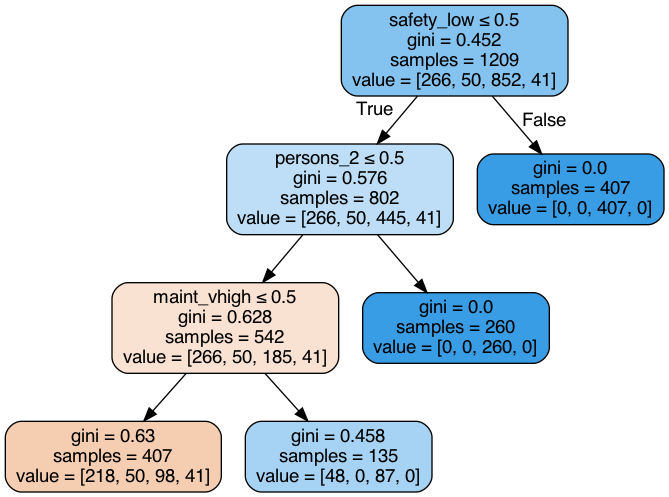

In [103]:
# Visualizar a árvore usando graphviz
dot_data = export_graphviz(treeclf, 
                           out_file = None, 
                           feature_names = atributos, 
                           filled = True, 
                           rounded = True, 
                           special_characters = True
                          )

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())

####  <span style = "color:red">Código Original.</span>
<!---
# Visualizar a árvore usando graphviz
dot_data = export_graphviz(treeclf, 
                           out_file = None, 
                           feature_names = atributos, 
                           filled = True, 
                           rounded = True, 
                           special_characters = True
                          )

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
-->

#### Note que podemos observar o grau de importância de cada atributo com o auxílio do parâmetro `feature_importances_`, que retornar a redução total normalizada de critérios por recurso, por meio da [Importância de Gini](https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3).

In [104]:
# Calcular a importância dos atributos
pd.DataFrame({'Atributo':atributos, 
              'importancia':treeclf.feature_importances_}
            ).sort_values('importancia', 
                          ascending = False).head()

,Atributo,importancia
12,persons_2,0.530079
19,safety_low,0.371993
7,maint_vhigh,0.097928
0,buying_high,0.000000
11,doors_5more,0.000000


####  <span style = "color:red">Código Original.</span>
<!---
# Calcular a importância dos atributos
pd.DataFrame({'Atributo':atributos, 
              'importancia':treeclf.feature_importances_}
            ).sort_values('importancia', 
                          ascending = False).head()
-->

#### Podemos calcular a matriz de confusão para as quatro classes de classificação de nossa árvore.

In [105]:
# Calcular e mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, 
                        treeclf.predict(X_test)
                       )

predicted_cols = ['pred_'+c for c in le.classes_]

pd.DataFrame(conf, 
             index = le.classes_, 
             columns = predicted_cols
            )

,pred_acc,pred_good,pred_unacc,pred_vgood
acc,94,0,24,0
good,19,0,0,0
unacc,32,0,326,0
vgood,24,0,0,0


####  <span style = "color:red">Código Original.</span>
<!---
# Calcular e mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, 
                        treeclf.predict(X_test)
                       )

predicted_cols = ['pred_'+c for c in le.classes_]

pd.DataFrame(conf, 
             index = le.classes_, 
             columns = predicted_cols
            )
-->

#### Em que as classe para nosso target são.

In [106]:
le.classes_

array(['acc', 'good', 'unacc', 'vgood'], dtype=object)

####  <span style = "color:red">Código Original.</span>
<!---
le.classes_
-->

#### Se removermos a restrição para o número máximo de nós em nossa árvore de decisão, teremos:

In [107]:
# Remover a restrição de max_depth = 3 e ver se a classificação melhora
treeclf = DecisionTreeClassifier(random_state = 1)

treeclf.fit(X_train, 
            y_train
           )

y_pred = treeclf.predict(X_test)

conf = confusion_matrix(y_test, 
                        y_pred
                       )

predicted_cols = ['pred_'+c for c in le.classes_]

pd.DataFrame(conf, index = le.classes_, 
             columns = predicted_cols
            )

,pred_acc,pred_good,pred_unacc,pred_vgood
acc,105,4,6,3
good,1,17,0,1
unacc,3,0,355,0
vgood,3,2,0,19


####  <span style = "color:red">Código Original.</span>
<!---
# Remover a restrição de max_depth = 3 e ver se a classificação melhora
treeclf = DecisionTreeClassifier(random_state = 1)

treeclf.fit(X_train, 
            y_train
           )

y_pred = treeclf.predict(X_test)

conf = confusion_matrix(y_test, 
                        y_pred
                       )

predicted_cols = ['pred_'+c for c in le.classes_]

pd.DataFrame(conf, index = le.classes_, 
             columns = predicted_cols
            )
-->

#### Considerando a remoção da profundidade máxima `max_depth`, vamos visualizar a última árvore. 

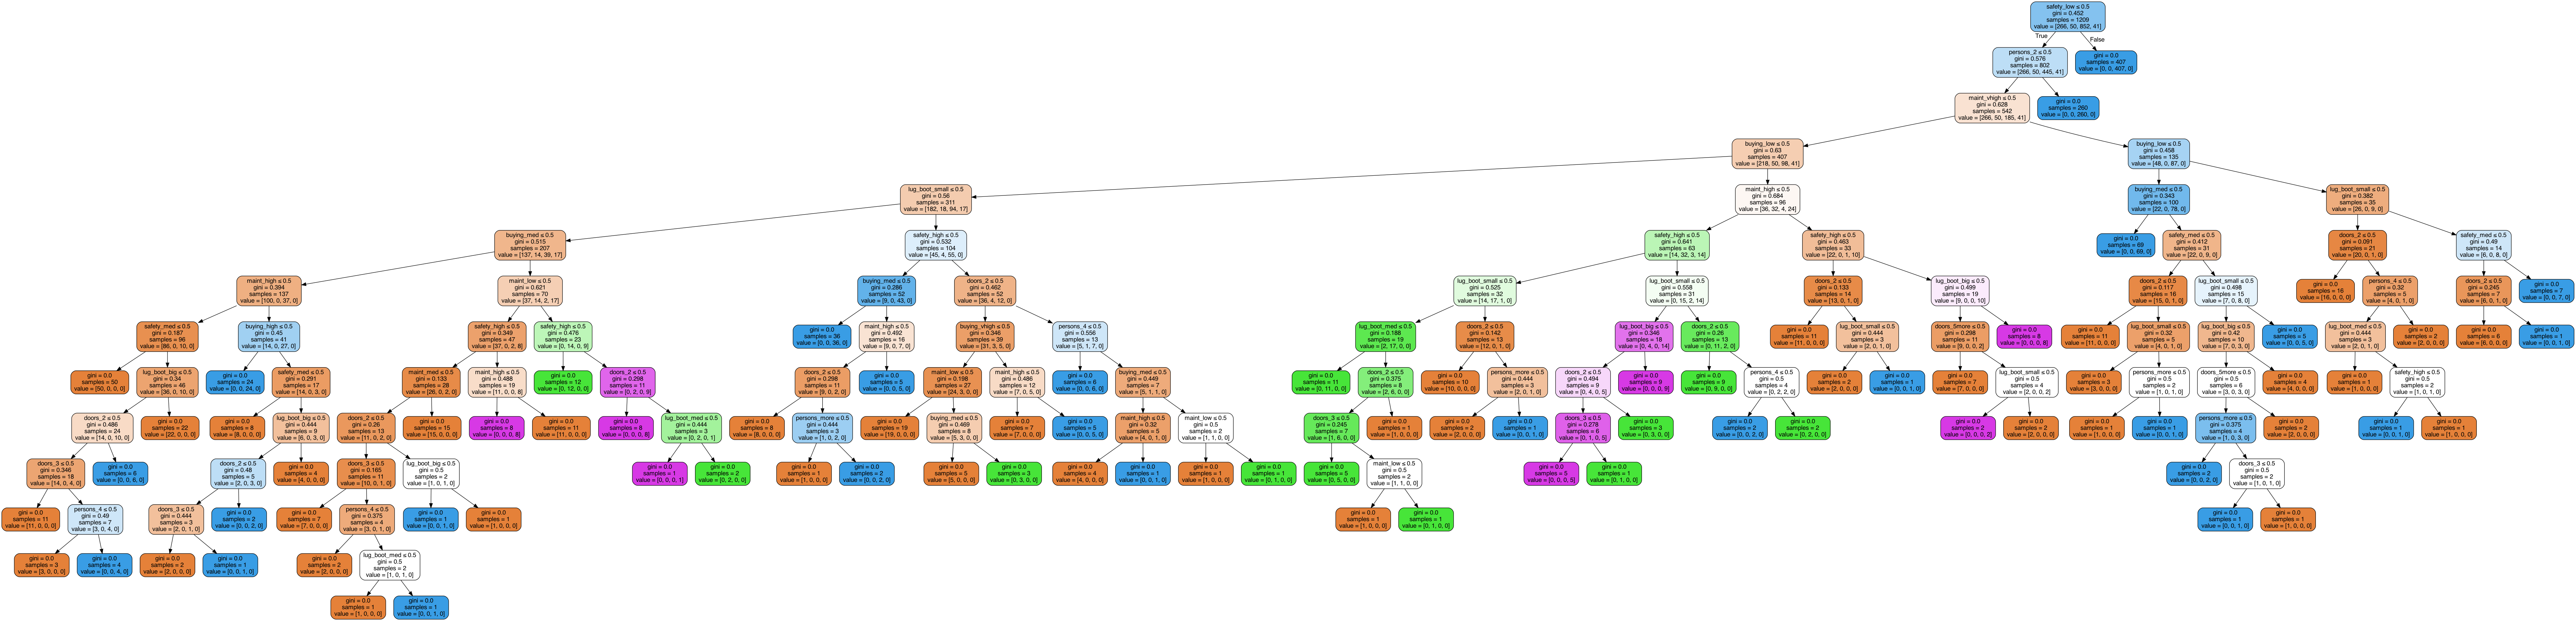

In [108]:
dot_data = export_graphviz(treeclf, 
                           out_file = None, 
                           feature_names = atributos, 
                           filled = True, 
                           rounded = True, 
                           special_characters = True
                          )

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())  

####  <span style = "color:red">Código Original.</span>
<!---
dot_data = export_graphviz(treeclf, 
                           out_file = None, 
                           feature_names = atributos, 
                           filled = True, 
                           rounded = True, 
                           special_characters = True
                          )

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())
-->

#### É possível interpretá-la? O que isso mostra sobre a interpretação da árvore de decisão?

###  <span style = "color:blue">Prática Independente.</span>

#### Carregue o dataset `iris` a partir do `sklearn`, faça uma análise exploratória dos dados e realize a classificação das espécies com uma árvore de decisão. Plote a árvore obtida e estude a importância de cada atributo. Calcule a matriz de confusão e as métricas de qualidade do modelo.

####  <span style = "color:red">Código Original.</span>
<!---
#Ler os dados com Pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.model_selection import train_test_split
-->

####  <span style = "color:red">Código Original.</span>
<!---
data = load_iris()
#type(data)

X = pd.DataFrame(data.data, 
                 columns = data.feature_names
                )
y = pd.DataFrame(data.target, 
                 columns = ['species']
                )

#X.sample(10)
#y.sample(10)
-->

####  <span style = "color:red">Código Original.</span>
<!---
iris = pd.concat([X, y], axis = 1)
#iris.sample(10)
iris.head()
-->

####  <span style = "color:red">Código Original.</span>
<!---
iris.shape
-->

####  <span style = "color:red">Código Original.</span>
<!---
iris.isnull().sum()
-->

####  <span style = "color:red">Código Original.</span>
<!---
iris.info()
-->

####  <span style = "color:red">Código Original.</span>
<!---
atributos = X.columns

# Dividir X e y com train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 42
                                                   )
-->

####  <span style = "color:red">Código Original.</span>
<!---
atributos
-->

####  <span style = "color:red">Código Original.</span>
<!---
# Ajustar uma árvore de classificação com max_depth = 3

from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth = 3, 
                                 random_state = 1
                                )
treeclf.fit(X_train, 
            y_train
           )
-->

####  <span style = "color:red">Código Original.</span>
<!---
# Visualizar a árvore usando graphviz
dot_data = export_graphviz(treeclf, 
                           out_file = None, 
                           feature_names = atributos, 
                           filled = True, 
                           rounded = True, 
                           special_characters = True
                          )

graph = pydotplus.graph_from_dot_data(dot_data)

Image(graph.create_png())
-->

####  <span style = "color:red">Código Original.</span>
<!---
# Calcular a importância dos atributos
pd.DataFrame({'Atributo':atributos, 
              'importancia':treeclf.feature_importances_}
            ).sort_values('importancia', 
                          ascending = False).head()
-->

####  <span style = "color:red">Código Original.</span>
<!---
# Calcular e mostrar a matriz de confusão
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, 
                        treeclf.predict(X_test)
                       )
conf
-->

####  <span style = "color:red">Código Original.</span>
<!---
from sklearn.metrics import classification_report
print(classification_report(y_test, treeclf.predict(X_test)))
-->